# Lab Notebook

    Course: BioE 131
    Lab No: Lab #8
    Submission date: Oct 24, 2018
    
    Team members: Michael Fernandez, Jinho Ko

## Execute sequence alignment

screen

-- < in screen > --  
spades -o /home/be131-08/lab8/  -1 /data/lab8/illumina_reads_R1.fastq -2 /data/lab8/illumina_reads_R2.fastq --pacbio /data/lab8/pacbio_reads.fastq -t 1

-- < detached > --  
32451.pts-195.meowth    (10/12/2018 05:59:56 PM)        (Detached)

![./terminal.JPG.jpg](./terminal.JPG)

## Question about spades

**Why do we expect short reads to produce a more fragmented assembly than long reads?**

In alignment scoring scheme, short reads would be more likely to result in high match score, which have more possibility for producing more fragmented assembly.

**Why does a single-molecule sequencing like PacBio have a higher error rate than Illumina?**

Pacbio has more long reads compared to programs like Illumina, therefore have higher error rates.



## SPAdes result

===== Assembling finished. Used k-mer sizes: 21, 33, 55, 77, 99, 127 

 * Corrected reads are in /home/be131-08/lab8/corrected/
 * Assembled contigs are in /home/be131-08/lab8/contigs.fasta
 * Assembled scaffolds are in /home/be131-08/lab8/scaffolds.fasta
 * Assembly graph is in /home/be131-08/lab8/assembly_graph.fastg
 * Assembly graph in GFA format is in /home/be131-08/lab8/assembly_graph_with_scaffolds.gfa
 * Paths in the assembly graph corresponding to the contigs are in /home/be131-08/lab8/contigs.paths
 * Paths in the assembly graph corresponding to the scaffolds are in /home/be131-08/lab8/scaffolds.paths

======= SPAdes pipeline finished WITH WARNINGS!

=== Error correction and assembling warnings:
 * 0:20:28.353   564M / 1G    WARN    General                 (kmer_coverage_model.cpp   : 218)   Too many erroneous kmers, the estimates might be unreliable
======= Warnings saved to /home/be131-08/lab8/warnings.log

SPAdes log can be found here: /home/be131-08/lab8/spades.log

Thank you for using SPAdes!

## Assembly-stats

be131-08@meowth:~/lab8$ assembly-stats contigs.fasta  
stats for contigs.fasta  
**sum = 6678635, n = 176**, ave = 37946.79, largest = 414008  
N50 = 234690, **n = 11**  
N_count = 0  
Gaps = 0  

be131-08@meowth:~/lab8$ assembly-stats scaffolds.fasta  
stats for scaffolds.fasta  
**sum = 6678655, n = 174**, ave = 38383.07, largest = 414008  
N50 = 234690, **n = 11**  
N_count = 20  
Gaps = 2  

**Why is N50 is useful statistic to calculate? Why not just list the mean or median contig length?**
In your assembly, are scaffolds longer than contigs, or are scaffolds approximately equal to contigs?

It gives the idea about the most meaningful reads and overally how successful our reads were in creating contigs. 

We don't use mean because there are many smaller reads in the total alignment, which would weight our mean towards smaller length contigs that are less useful. We are interested in areas where reads came together to form a significant portion of our alignment. 

Scafolds should have longer elements but should have less elements because scafolds are made out of joined contigs.




14.047800113636363


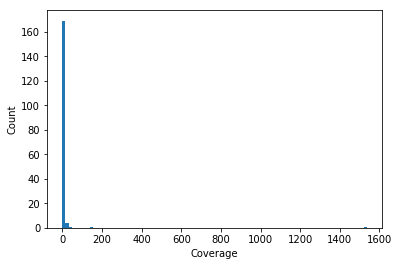

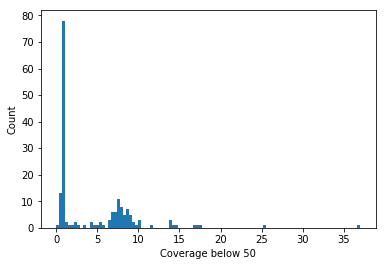

In [28]:
import matplotlib.pyplot as plt

file_io = open('contigs.fasta','r')
contig_list = []

for line in file_io.read().split('\n'):
    if len(line) is 0 :
        break
    if line[0] == '>':
        tmp = line[line.index('cov')+4:-1]
        contig_list.append(float(tmp))

print(sum(contig_list)/len((contig_list)))
plt.xlabel('Coverage')
plt.ylabel('Count')

p = plt.hist(contig_list,bins = 100)

# display every data
plt.show()

for i in contig_list:
    if i > 50.0:
        contig_list.remove(i)
        
contig_list[-1]=0
        
plt.xlabel('Coverage below 50')
plt.ylabel('Count')
p = plt.hist(contig_list,bins = 100)

# display below 50
plt.show()

## Extra credit : Histogram questions

**Is coverage uniformly distributed? Does it look Gaussian? 
Is it bimodalor trimodal? What explains the presence of contigs with coverage an integer multiple of the mean coverage?**

The coverage is bimodular and the reason it is an integer multiple of mean coverage is because it is likley that this contig has multiple copies of this region. Which makes sense because many bacteria have multiple copies of the same gene.

## rna_hmm3.py

rna_hmm3.py -i contigs.fasta -o contigs_hmm.gff  

##seq_name	method	feature	start	end	evalue	strand	frame	attribute  
NODE_23_length_103367_cov_10.081286	rna_hmm3	rRNA	35531	37075	0	+	NA	16S_rRNA  
NODE_18_length_154232_cov_9.584186	rna_hmm3	rRNA	124542	126086	0	+	NA	16S_rRNA  
NODE_5_length_327223_cov_9.241629	rna_hmm3	rRNA	46286	47830	0	+	NA	16S_rRNA  
NODE_6_length_298784_cov_8.918606	rna_hmm3	rRNA	13926	15470	0	+	NA	16S_rRNA  
NODE_4_length_332509_cov_9.114046	rna_hmm3	rRNA	137012	138556	0	-	NA	16S_rRNA  
NODE_2_length_378948_cov_10.006665	rna_hmm3	rRNA	348500	350044	0	+	NA	16S_rRNA  


## bedtools

bedtools getfasta -fi contigs.fasta -bed contigs_hmm.gff

>NODE_23_length_103367_cov_10.081286:35530-37075
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_18_length_154232_cov_9.584186:124541-126086
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_5_length_327223_cov_9.241629:46285-47830
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_6_length_298784_cov_8.918606:13925-15470
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_4_length_332509_cov_9.114046:137011-138556
TCGATTAAGGAGGTGATCCAGCCGCAGGTTCCCCTACGGCTACCTTGTTACGACTTCACCCCAGTCATGAATCACACCGTGGTAACCGTCCTCCCGAAGGTTAGACTAGCTACTTCTGGTGCAACCCACTCCCATGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGACATTCTGATTCGCGATTACTAGCGATTCCGACTTCACGCAGTCGAGTTGCAGACTGCGATCCGGACTACGATCGGTTTTCTGGGATTAGCTCCACCTCGCGGCTTGGCAACCCTCTGTACCGACCATTGTAGCACGTGTGTAGCCCAGGCCGTAAGGGCCATGATGACTTGACGTCATCCCCACCTTCCTCCGGTTTGTCACCGGCAGTCTCCTTAGAGTGCCCACCATTACGTGCTGGTAACTAAGGACAAGGGTTGCGCTCGTTACGGGACTTAACCCAACATCTCACGACACGAGCTGACGACAGCCATGCAGCACCTGTCTCAATGTTCCCGAAGGCACCAATCCATCTCTGGAAAGTTCATTGGATGTCAAGGCCTGGTAAGGTTCTTCGCGTTGCTTCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCATTTGAGTTTTAACCTTGCGGCCGTACTCCCCAGGCGGTCAACTTAATGCGTTAGCTGCGCCACTAAGAGCTCAAGGCTCCCAACGGCTAGTTGACATCGTTTACGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCACCTCAGTGTCAGTATCAGTCCAGGTGGTCGCCTTCGCCACTGGTGTTCCTTCCTATATCTACGCATTTCACCGCTACACAGGAAATTCCACCACCCTCTACCATACTCTAGCTCGTCAGTTTTGAATGCAGTTCCCAGGTTGAGCCCGGGGATTTCACATCCAACTTAACGAACCACCTACGCGCGCTTTACGCCCAGTAATTCCGATTAACGCTTGCACCCTCTGTATTACCGCGGCTGCTGGCACAGAGTTAGCCGGTGCTTATTCTGTCGGTAACGTCAAAACAATTACGTATTAGGTAACTGCCCTTCCTCCCAACTTAAAGTGCTTTACAATCCGAAGACCTTCTTCACACACGCGGCATGGCTGGATCAGGCTTTCGCCCATTGTCCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGACCGTGTCTCAGTTCCAGTGTGACTGATCATCCTCTCAGACCAGTTACGGATCGTCGCCTTGGTGAGCCATTACCTCACCAACTAGCTAATCCGACCTAGGCTCATCTGATAGCGCAAGGCCCGAAGGTCCCCTGCTTTCTCCCGTAGGACGTATGCGGTATTAGCGTCCGTTTCCGAGCGTTATCCCCCACTACCAGGCAGATTCCTAGGCATTACTCACCCGTCCGCCGCTCTCAAGAGGTGCAAGCACCTCTCTACCGCTCGACTTGCATGTGTTAGGCCTGCCGCCAGCGTTCAATCTGAGCCATGATCAAACTCTTCAGTTCAAA
>NODE_2_length_378948_cov_10.006665:348499-350044
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA

## SeqMatch

From all 6 sequences, the resulted showed **'genus Pseudomonas (20)'**  

Out of all of our sequences, all had similar results. The top similarity score was frederiksbrgensis and the most common match was Pseudomonas mandelii.

The picture below shows the seqMatch result of 1 match.
![seqmatch](./seqmatch.JPG)

## Annotation Results

RAST : http://rast.nmpdr.org/seedviewer.cgi?page=Organism&organism=6666666.379160  [ID : mikeandjinho  PW : OCbAUlEJ ]  
Basys : https://www.basys.ca/server4/basys/cache/1b7c99b2e97cf40b0956ed05a1d0f30f/index.html  

![rast](./rast_result.JPG)
![basys](./basys_result.JPG)

## Write-up question


#### Does your genome encode any known antibiotic resistance genes? Do you expect it to be susceptible to penicillin, tetracycline, or chloramphenicol?

Our sequenced genome was identified as gram negative Pseudomonas aeruginosa and in our annotation the bacterium had several drug resistance markers. In the RAST annotation the system identified tolerance to colicin E2, streptothricin and fosfomycin resistance as well as multidrug resistance via efflux pumps. As note in Multi drug-resistance efflux pumps –not just for resistance by Laura J.V Piddock, efflux pumps serve to pump antibiotics out of the cytosol of the bacteria. In this paper chloramphenicol, penicillin and tetracycline are mentioned as being susceptible to efflux pump overexpression resistance. The pumps that are responsible for this resistance in gram negative bacteria are members of the RND family. These pumps connect the inner and outer membranes and mutants typically have 2-8 fold higher expression of these efflux pumps. This paper also cites the experiments with Pseudomonas aeruginosa lacking efflux pumps lack the ability to infect invade epithelial kidney cells and are only able to invade these cells with further complementation of efflux pumps. This causes me to believe that the strain of Pseudomonas aeruginosa that we sequenced may both have antibiotic resistance as well as higher levels of virulence. This makes sense because the factors that allow a bacteria to propagate are dependant on sending out virulence determinants into the environment. Whether the bacteria we sequence has upregulation up these genes is difficult to determine but through the BASys annotation system we were able to identify emrA and emrB, two proteins involved in efflux pump pathway. This further supports the idea that our strain has multiple drugs resistance via the efflux pump mechanism. 

https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004095  
https://www.ncbi.nlm.nih.gov/pubmed/16845433

#### Horizontal gene transfer is common among bacteria. Is there any evidence for HGT in your genome?

Horizontal gene transfer(HGT) is common among bacteria, compared to eukaryotes. The mechanism of HGT is to transfer genes from one to another not by genetics, but by physical transfering process. There are 4 known mechanisms for HGT, which are transformation, transduction, bacterial conjugation and by gene transferring agents. According to Matt Ravenhall from 'Inferring Horizontal Gene Transfer', there are various methods for detecting (or inferring) HGT evidences from a genome. Most basically, phylogenetic methods are used to find HGT evidences and marks. However, for some cases where its phylogeny is not known, it is inevitable to apply an alternative method, which is detecting radical changes in nucleotide composition (e.g. G-C content %). In RAST and Basys, phylogenetic analysis is not made since the main purpose of these programs are to add annotations in sequences. However, in Basys annotation, we could find out overall review about sliding nucleotide composition. For HGT regions in the genome, the nucleotide composition is obviously different from non-HGT regions, which leads to notable points in GC content graph. The graph is shown below. There are 4 inferrable locations of HGT, assuming the criteria of HGT as 50% G-C content. They are located at approximately 10k, 100k, 230k, 370k-390k. For the first three results, there are obvious argmax for each position, in which we can strongly infer the evidence of HGT. However, for the the fourth result, 370k-390k, it would be hard to define this position as HGT, since the normal length of HGT does not exceed 1kb, while this region has length over 20kb, by Vadim Mozhayskiy-'Horizontal gene transfer dynamics and distribution of fitness effects during microbial in silico evolution'. As we can figure out from this case, it is difficult to define HGT only by nucleotide composition, thus phylogenetic approach or BLAST process should be made as well to support the vague inference.




![gccontent](./gccontent.JPG)

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4462595/
https://www.researchgate.net/publication/230614308_Horizontal_gene_transfer_dynamics_and_distribution_of_fitness_effects_during_microbial_in_silico_evolution